In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
from sklearn.preprocessing import LabelEncoder

# Load the dataset
data = pd.read_csv(r"D:\kaggle\diabetics prediction\diabetes_prediction_dataset.csv")



In [3]:
# Identify categorical columns
categorical_cols = data.select_dtypes(include=['object']).columns.tolist()




In [4]:
# Initialize LabelEncoder
le = LabelEncoder()



In [5]:
# Apply Label Encoding to categorical columns
for col in categorical_cols:
    data[col] = le.fit_transform(data[col])
    print(f"Classes for {col}: {le.classes_}")

# Check the updated DataFr
data.head(2)

Classes for gender: ['Female' 'Male' 'Other']
Classes for smoking_history: ['No Info' 'current' 'ever' 'former' 'never' 'not current']


,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,4,25.19,6.6,140,0
1,0,54.0,0,0,0,27.32,6.6,80,0


In [6]:
# Verify the data types of all columns
print(data.dtypes)


gender                   int32
age                    float64
hypertension             int64
heart_disease            int64
smoking_history          int32
bmi                    float64
HbA1c_level            float64
blood_glucose_level      int64
diabetes                 int64
dtype: object


In [7]:
# Assign features and target
X = data.drop(columns=['diabetes'])
y = data['diabetes']




In [8]:
# Check the first few rows of X and y
print(X.head())
print(y.head())

   gender   age  hypertension  heart_disease  smoking_history    bmi  \
0       0  80.0             0              1                4  25.19   
1       0  54.0             0              0                0  27.32   
2       1  28.0             0              0                4  27.32   
3       0  36.0             0              0                1  23.45   
4       1  76.0             1              1                1  20.14   

   HbA1c_level  blood_glucose_level  
0          6.6                  140  
1          6.6                   80  
2          5.7                  158  
3          5.0                  155  
4          4.8                  155  
0    0
1    0
2    0
3    0
4    0
Name: diabetes, dtype: int64


In [9]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the KNN Classifier
knn_clf = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors
knn_clf.fit(X_train, y_train)



KNeighborsClassifier()

In [10]:
# Make predictions
y_pred = knn_clf.predict(X_test)




In [11]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'\nAccuracy: {accuracy:.2f}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{class_report}')


Accuracy: 0.95
Confusion Matrix:
[[18160   132]
 [  819   889]]
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97     18292
           1       0.87      0.52      0.65      1708

    accuracy                           0.95     20000
   macro avg       0.91      0.76      0.81     20000
weighted avg       0.95      0.95      0.95     20000



In [12]:
import numpy as np

# Define the manual prediction array (values should match the feature columns)
manual_array = np.array([[0, 55, 0, 1, 0, 30.5, 7.0, 120]])  # Example values

# Make predictions
manual_prediction = knn_clf.predict(manual_array)

# Display the result
print(f'Predicted class for the manual array: {manual_prediction[0]}')


Predicted class for the manual array: 0


D:\EMPTY\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


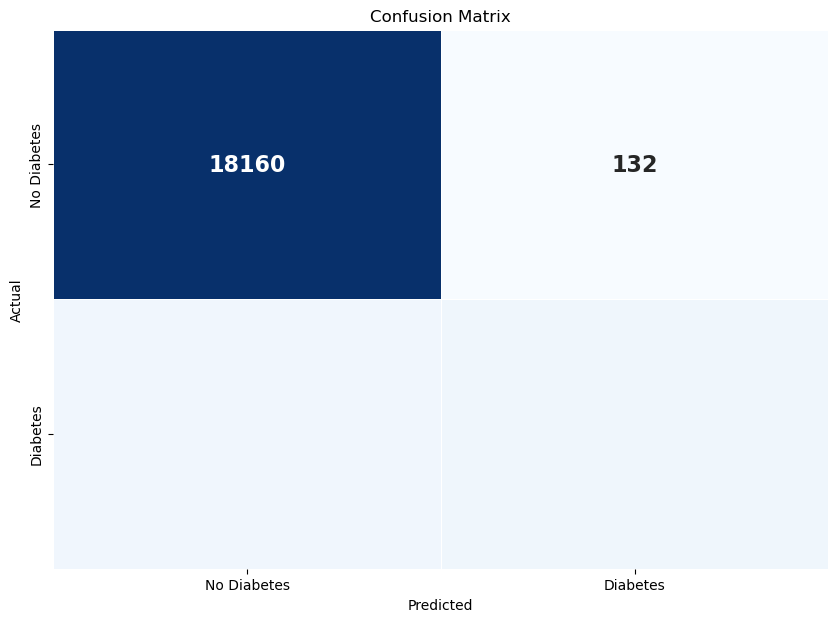

In [13]:
# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Create a DataFrame for better plotting
conf_matrix_df = pd.DataFrame(conf_matrix, 
                              index=['No Diabetes', 'Diabetes'], 
                              columns=['No Diabetes', 'Diabetes'])

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_df, annot=True, fmt='d', cmap='Blues', 
            cbar=False, 
            annot_kws={"size": 16, "weight": "bold"},
            linewidths=.5)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()